# Perceptron

[Source](https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/)

[Source2](https://brilliant.org/wiki/perceptron/)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt 

# Modelo

Idea general del perceptrón:
* Es un algoritmo de aprendizaje supervisado para clasificación.
* Es la suma de las entradas x<sub>i</sub> ponderadas por pesos w<sub>i</sub>.
* Se ocupa una función de activación a la salida de la neurona, en este caso el escalón.

El entrenamiento consiste en:
* A partir de los datos de entrada, el objetivo es calcular los pesos.

Una vez entrenado:
* Clasifica datos nuevos.

![](images/perceptron.png)

Vamos a necesitar:
- Función que deseamos entrenar
- Valores de entrenamiento
- Pesos al azar
- Función de activación
- Hyper Parámetros

## Función a entrenar: OR

| A | B | A or B |
|---|---|--------|
| 0 | 0 | 0      |
| 0 | 1 | 1      |
| 1 | 0 | 1      |
| 1 | 1 | 1      |

## Valores de entrenamiento

In [3]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

## Pesos iniciales
Un aspecto de considerar de nuestro problema es que tendremos 3 pesos:
* 2 entradas: $w_1$ de $A$ y $w_2$ de $B$ (`A` y `B` en la tabla) 
* 1 de bías: $w_0$

In [61]:
weights = np.random.rand(2)
bias = random.random()
print("Weights:", weights)
print("Bias:", bias)

Weights: [ 0.12113703  0.64428499]
Bias: 0.5225082353420727


## Funcion de activación

In [34]:
def step(x):
    if x<0:
        return 0
    return 1

In [35]:
print(step(-1))
print(step(-0.1))
print(step(0))
print(step(0.1))
print(step(1))

0
0
1
1
1


## Hyper Parámetros

In [36]:
learningRate = 0.2

# Entrenamiento
El entrenamiento está dado en 4 pasos:
1. Empezar con valores al azar a los pesos $w(0)$ ($w_1$, $w_2$) y al bias $w_0$.
2. Para cada entrada $x_i$, encontrar un arreglo de pesos $w$, tal que $w(t) \cdot x_i + w_0 > 0$. Con $y_i$ la salida para la entrada $x_i$.
3. Actualizar los pesos para la siguiente iteración:
    - $w(t+1) = w(t) + \alpha(d_i - y_i)x_i$
    - $w_0(t+1) = w_0(t) + \alpha(d_i - y_i)$
4. Si el entrenamiento es offline (se entrenan con las mismas entradas), se repiten los pasos 2 y 3 hasta que se reduce el error lo suficiente.

Desde los datos de entrenamiento tenemos:
* $x_i$
* $d_i$

Para cada input, debemos calcular: 
* $y_i$

Con los $y_i$, calculamos los nuevos pesos $w_i$.

## Ejemplo manual

In [303]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

In [304]:
learningRate = 0.5

In [305]:
wi = [0, 0]
w0 = 0
print("wi:", wi)
print("w0:", w0)

wi: [0, 0]
w0: 0


### Epoch 1; Iteración 1
Valor entrenamiento $x_0$

In [306]:
i = 0
xi, di = trainingData[i]
print("xi:", xi, "di", di)

xi: [0, 0] di 0


In [307]:
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)

yi: 0


In [308]:
print("di-yi:", di - yi)

di-yi: 0


In [309]:
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)

new weigth: [ 0.  0.]


In [310]:
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

new bias: 0.0


### Epoch 1; Iteración 2
Valor entrenamiento $x_1$

In [311]:
i = 1
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)
print("di-yi:", di - yi)
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

xi: [0, 1] di 0
yi: 0.0
di-yi: 0.0
new weigth: [ 0.  0.]
new bias: 0.0


### Epoch 1; Iteración 3
Valor entrenamiento $x_2$

In [312]:
i = 2
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)
print("di-yi:", di - yi)
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

xi: [1, 0] di 0
yi: 0.0
di-yi: 0.0
new weigth: [ 0.  0.]
new bias: 0.0


### Epoch 1; Iteración 4
Valor entrenamiento $x_3$

In [313]:
i = 3
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)
print("di-yi:", di - yi)
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

xi: [1, 1] di 1
yi: 0.0
di-yi: 1.0
new weigth: [ 0.5  0.5]
new bias: 0.5


### Epoch 2;
Todos los valores de entrenamiento de nuevo.

In [314]:
for i in range(len(trainingData)):
    xi, di = trainingData[i]
    yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
    wi = wi + learningRate*(di-yi)*np.array(xi)
    w0 = w0 + learningRate*(di-yi)

print("xi:", xi, "di", di)
print("yi:", yi)
print("di-yi:", di - yi)
print("new weigth:", wi)
print("new bias:", w0)

xi: [1, 1] di 1
yi: 0.125
di-yi: 0.875
new weigth: [ 0.75    0.5625]
new bias: 0.125


### Epoch 3;
Todos los valores de entrenamiento de nuevo.

In [315]:
for i in range(len(trainingData)):
    xi, di = trainingData[i]
    yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
    wi = wi + learningRate*(di-yi)*np.array(xi)
    w0 = w0 + learningRate*(di-yi)

print("xi:", xi, "di", di)
print("yi:", yi)
print("di-yi:", di - yi)
print("new weigth:", wi)
print("new bias:", w0)

xi: [1, 1] di 1
yi: 0.25
di-yi: 0.75
new weigth: [ 0.875  0.625]
new bias: -0.125


### Cuando detenerse?
Después de varias iteraciones, los pesos convergen a un valor del cual después no se modifican. En este caso, iteraremos hasta llegar a un delta (0.01) entre estos valores.

In [317]:
while True:
    old_wi = wi
    old_w0 = w0
    
    for i in range(len(trainingData)):
        xi, di = trainingData[i]
        yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
        wi = wi + learningRate*(di-yi)*np.array(xi)
        w0 = w0 + learningRate*(di-yi)

    print("xi:", xi, "di", di)
    print("yi:", yi)
    print("di-yi:", di - yi)
    print("new weigth:", wi)
    print("new bias:", w0)
    print()
    
    if( (old_wi - wi  < 0.01).all() and (old_w0 - w0) < 0.01 ):
        print("Sucess")
        break

xi: [1, 1] di 1
yi: 0.49462890625
di-yi: 0.50537109375
new weigth: [ 0.99902344  0.74731445]
new bias: -0.49365234375

Sucess


### Lecciones
Algunos puntos importantes que revisamos durante este proceso:
* Los pesos en este caso partieron en cero. Esto implica que siempre que se entrene este sistema con los mismos valores de entrada, se llegará al mismo resultado. Esto puede ser negativo en algunos casos y se recomienda iniciar los pesos con valores random:
    - `wi = random.rand(2)`
    - `w0 = random.random()`.
* Para los 3 primeros valores de entrada, en la primera iteración, no se avanzó en nada. Esto puede pasar, sobre todo con miles de valores de entrada. Para generalizar más la solución, se recomienda tomar al azar los valores desde el set de entrada en cada iteración:
    - `xi, di = random.choice(trainingData)`

## Algoritmo:

In [7]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]
learningRate = 0.2
wi = np.random.rand(2)
w0 = random.random()
delta = 0.00001

In [31]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]
learningRate = 0.5
wi = [0, 0]
w0 = 0
delta = 0.01

while True:
    old_wi = wi
    old_w0 = w0
    
    for i in range(len(trainingData)):
        xi, di = random.choice(trainingData)
        yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
        wi = wi + learningRate*(di-yi)*np.array(xi)
        w0 = w0 + learningRate*(di-yi)

    print("xi:", xi, "; di:", di)
    print("yi:", yi)
    print("di-yi:", di - yi)
    print("new weigth:", wi)
    print("new bias:", w0)
    print()
    
    if(abs(old_w0 - w0) < delta ):
        print("Sucess")
        break

xi: [0, 0] ; di: 0
yi: 0.625
di-yi: -0.625
new weigth: [ 0.375  0.25 ]
new bias: 0.3125

xi: [0, 0] ; di: 0
yi: 0.53125
di-yi: -0.53125
new weigth: [ 0.375    0.46875]
new bias: 0.265625

xi: [0, 0] ; di: 0
yi: 0.2109375
di-yi: -0.2109375
new weigth: [ 0.3203125  0.234375 ]
new bias: 0.10546875

xi: [0, 0] ; di: 0
yi: 0.27880859375
di-yi: -0.27880859375
new weigth: [ 0.44238281  0.56445312]
new bias: 0.139404296875

xi: [1, 0] ; di: 1
yi: 0.695007324219
di-yi: 0.304992675781
new weigth: [ 0.59487915  0.74737549]
new bias: 0.405120849609

xi: [1, 1] ; di: 1
yi: 1.43044281006
di-yi: -0.430442810059
new weigth: [ 0.37965775  0.45590591]
new bias: -0.0507850646973

xi: [0, 0] ; di: 0
yi: 0.420784473419
di-yi: -0.420784473419
new weigth: [ 0.70252514  0.57921553]
new bias: 0.21039223671

xi: [1, 0] ; di: 1
yi: 0.420784473419
di-yi: 0.579215526581
new weigth: [ 0.82496354  0.41204616]
new bias: 0.175036460161

xi: [0, 1] ; di: 1
yi: 0.381059542298
di-yi: 0.618940457702
new weigth: [ 0.868722

In [ ]:
yi = np.zeros(len(trainingData))

In [72]:
yi = np.zeros(len(trainingData))
for inputValue in trainingData:
    xi, expected = inputValue
    for i in range(len(xi)):
        yi = yi + xi[i] * weights[i] + bias
    

[0 0]
[0 1]
[0 0]
[0 1]


In [70]:
# Para cada entrada del set de entrenamiento:
for inputValue in trainingData:
    
    w0t = bias
    # Separar el set en valores xi y las salidas esperadas.
    xi, expected = inputValue
    for j in range(len(xi)):
        comparison = weights[j] * xi[j] + comparison;
        print(comparison)
    
    correctValue = expected
    classified = step(comparison)
        
    

0.522508235342
0.522508235342
0.522508235342
1.16679322878
0.643645268168
0.643645268168
0.643645268168
1.28793026161


In [38]:
foo = ['a', 'b', 'c', 'd', 'e']
print(random.choice(foo))

a


In [122]:
value, expected = random.choice(trainingData)
print(value, expected)

[1, 0] 1


Tengo unas dudas aquí: 
1. Porque elegir uno solo de los valores de entrenamiento y multiplicarlo por todos los pesos.

In [133]:
weights = np.random.rand(3)
for i in range(iterNums):
    value, expected = random.choice(trainingData)
    result = np.dot(weights, value)
    error = expected - step(result)
    errors.append(error)
    weights += learningRate * error * value

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

In [86]:
for x, _ in trainingData: 
    result = dot(x, w) 
    print("{}: {} -> {}".format(x[:2], result, unitStep(result)))

[0 0]: -0.14576129367652835 -> 0
[0 1]: 0.6909607994767166 -> 1
[1 0]: 0.40971353066320415 -> 1
[1 1]: 1.2464356238164491 -> 1


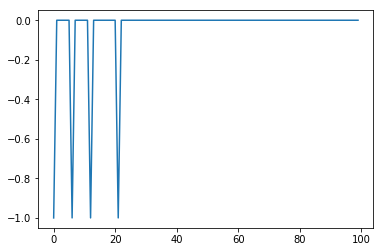

In [87]:
plt.plot(errors)
plt.show()